In [1]:
import gandula
from tqdm.auto import tqdm
import os
import sys

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\jllgo\OneDrive\Documentos\UFMG\MSc & MSI 2\MatchSegmentation\notebooks


In [4]:
current_dir = os.getcwd()
# Assume the project root is two levels up from the current working directory
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [5]:
from src.data.loader import FramesLoader
from src.data.graph_stream import GraphStream

In [6]:
DATA_PATH = '../data/raw/PL-22-23'
output_path = "../data/intermediate/PL-22-23"

In [7]:
games = os.listdir(DATA_PATH)
game_ids = [game.split('.')[0] for game in games]

In [8]:
frames_loader = FramesLoader(game_ids[:5], DATA_PATH)
frames_loader.load(output_path)
len(frames_loader)

Loading frames:   0%|          | 0/5 [00:00<?, ?it/s]

5

In [41]:
frame = frames_loader[0]

In [42]:
frame[0]['home_has_possession'].unique()

array([1., 0.])

In [43]:
frame[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17893 entries, 0 to 17892
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17893 non-null  int64  
 1   frame_id                17893 non-null  int64  
 2   period                  17893 non-null  int64  
 3   elapsed_seconds         17893 non-null  float64
 4   home_has_possession     17893 non-null  float64
 5   event_id                7822 non-null   float64
 6   event_type              17893 non-null  object 
 7   event_setpiece_type     17893 non-null  object 
 8   event_player_id         6592 non-null   float64
 9   event_team_id           6593 non-null   float64
 10  event_start_frame       6849 non-null   float64
 11  event_end_frame         6849 non-null   float64
 12  possession_id           1299 non-null   float64
 13  possession_type         17893 non-null  object 
 14  possession_start_frame  378 non-null  

In [44]:
frame[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369864 entries, 0 to 369863
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   elapsed_seconds  369864 non-null  float64
 1   frame_id         369864 non-null  int64  
 2   match_id         369864 non-null  int64  
 3   period           369864 non-null  int64  
 4   shirt            369864 non-null  int64  
 5   x                369864 non-null  float64
 6   y                369864 non-null  float64
 7   team             369864 non-null  object 
 8   ball_x           369864 non-null  float64
 9   ball_y           369864 non-null  float64
 10  ball_z           369864 non-null  float64
 11  ball_vx          369842 non-null  float64
 12  ball_vy          369842 non-null  float64
 13  ball_vz          369842 non-null  float64
 14  ball_speed       369842 non-null  float64
 15  ball_ax          369842 non-null  float64
 16  ball_ay          369842 non-null  floa

In [45]:
df_players = frame[1][frame[1]['team'] != 'home']

In [46]:
frame = list(frame)  # Convert tuple to list
frame[1] = df_players
frame = tuple(frame)  # Convert list back to tuple if needed
frame[1]

,elapsed_seconds,frame_id,match_id,period,shirt,x,y,team,ball_x,ball_y,...,ball_vz,ball_speed,ball_ax,ball_ay,ball_az,vx,vy,ax,ay,speed
0,0.000000,1594,4436,1,1,37.992,2.652,away,-2.43,0.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.199720,1600,4436,1,1,37.971,2.714,away,-5.24,0.83,...,0.000000,34.766179,-1041.894311,8.981848,0.000000,0.0,0.0,-0.898212,-9.880328,0.0
2,0.399920,1606,4436,1,1,38.016,2.722,away,-8.95,0.39,...,0.000000,36.859000,-1086.868694,-197.612490,0.000000,0.0,0.0,-52.096277,-12.574963,0.0
3,0.600120,1612,4436,1,1,38.197,2.791,away,-12.14,0.44,...,-0.599413,31.176658,-934.168133,-8.982386,-17.964772,0.0,0.0,-38.623102,-17.066022,0.0
4,0.800321,1618,4436,1,1,38.344,2.757,away,-15.01,0.30,...,0.000000,28.736581,-853.275513,-116.764018,0.000000,0.0,0.0,-58.382009,6.287293,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279428,2201.868657,152557,4436,2,35,-47.017,12.175,away,-50.83,5.28,...,-5.694249,46.037447,-449.092375,1293.386041,-170.655103,0.0,0.0,225.451129,-207.486896,0.0
279429,2202.068857,152563,4436,2,35,-47.717,12.876,away,-51.83,9.23,...,-6.293643,37.849765,-224.546188,1095.785396,-188.618798,0.0,0.0,202.097626,-210.181531,0.0
279430,2202.269057,152569,4436,2,35,-48.309,13.527,away,-52.30,12.77,...,-6.293832,37.923209,-188.630104,1104.833465,-188.630104,0.0,0.0,164.372736,-185.031604,0.0
279431,2202.469258,152575,4436,2,35,-48.803,14.107,away,-53.15,16.19,...,-2.397578,33.759541,-278.437273,970.039531,-71.854780,0.0,0.0,141.913191,-169.756918,0.0


In [47]:
dataset = GraphStream(frame, fully_conected=True)

c:\Users\jllgo\OneDrive\Documentos\UFMG\MSc & MSI 2\MatchSegmentation\src\data\graph_stream.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.players_df["frame_id"] = self.players_df["frame_id"].astype(int)
c:\Users\jllgo\OneDrive\Documentos\UFMG\MSc & MSI 2\MatchSegmentation\src\data\graph_stream.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.players_df["match_id"] = self.players_df["match_id"].astype(int)


True


Preparing arguments:   0%|          | 0/16688 [00:00<?, ?it/s]

Processing data:   0%|          | 0/16688 [00:00<?, ?it/s]

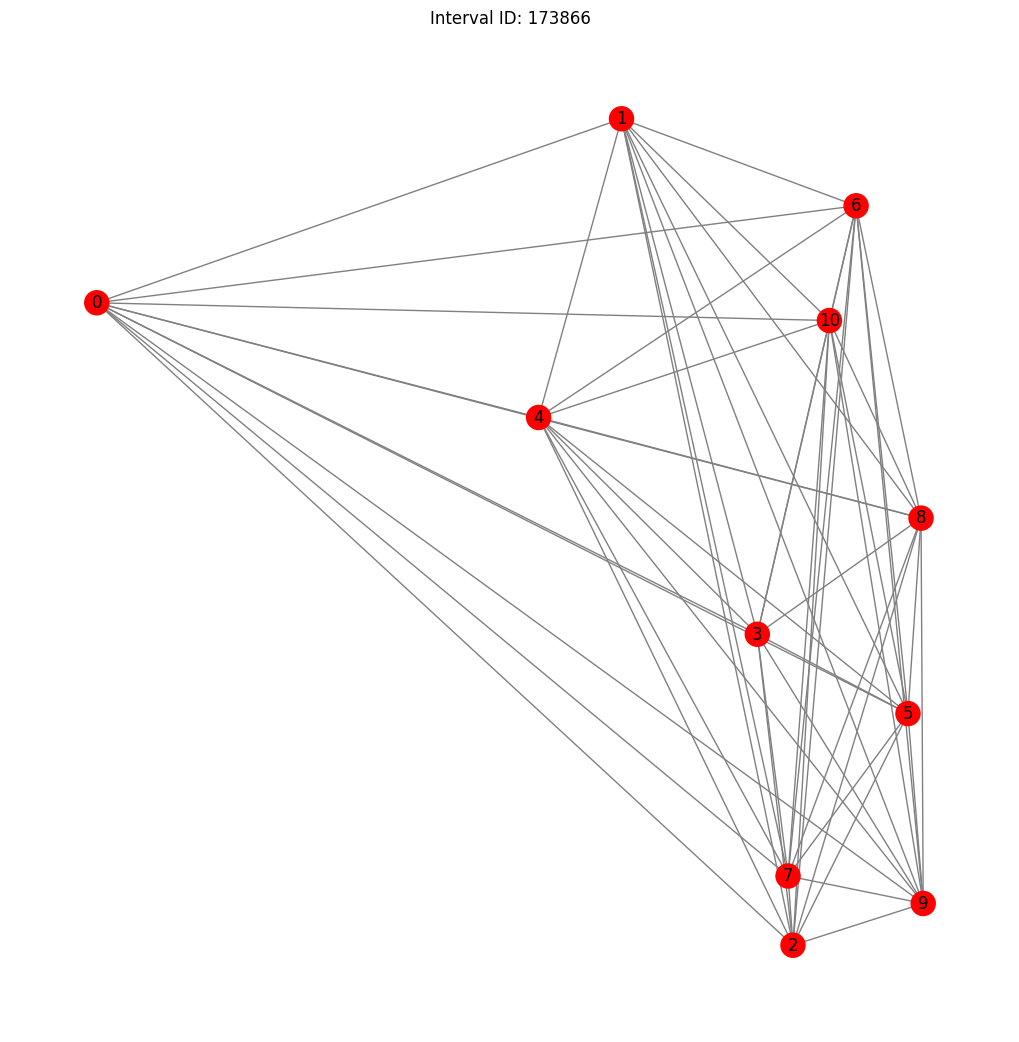

In [48]:
dataset.view(-3)

In [15]:
import networkx as nx

In [16]:
G, interval_id = dataset[0]
nx.betweenness_centrality(G, k=21)

ValueError: too many values to unpack (expected 2)